# Churn Prediction with Random Forest

Load Data and Required Libraries

In [ ]:
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Load data
df = pd.read_csv('/content/data_for_predictions.csv')
df.head()


,Unnamed: 0,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,0,1,0,0,0,0,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,...,76,4,1,0,0,0,0,1,0,0
2,2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,...,68,8,0,0,1,0,0,1,0,0
3,3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,0,1,0,1,0,0
4,4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,...,71,9,1,0,0,0,0,1,0,0


Explore and Prepare the Data

In [ ]:
# Check basic info
df.info()

# Check class balance
print(df['churn'].value_counts())

# Optional: Encode categorical variables if any
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Columns: 14668 entries, Unnamed: 0 to id_ffff7fa066f1fb305ae285bb03bf325a
dtypes: bool(14605), float64(46), int64(17)
memory usage: 210.5 MB
churn
0    13187
1     1419
Name: count, dtype: int64


In [ ]:
# Define X and y
X = df.drop('churn', axis=1)
y = df['churn']


Split the Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Train Random Forest Model

In [ ]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Predict and Evaluate

Accuracy: 0.9066


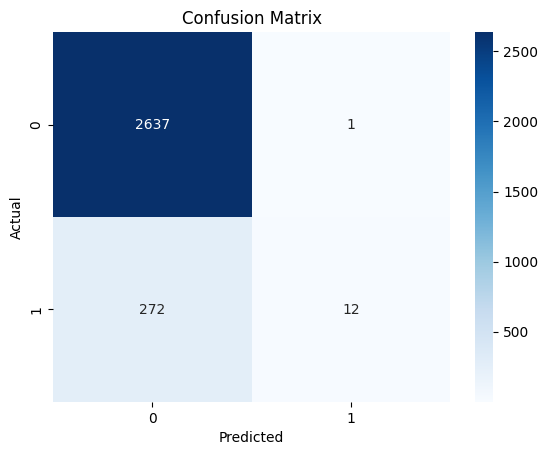

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2638
           1       0.92      0.04      0.08       284

    accuracy                           0.91      2922
   macro avg       0.91      0.52      0.52      2922
weighted avg       0.91      0.91      0.87      2922

ROC AUC Score: 0.7024


In [ ]:
# Predict
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# AUC Score
auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {auc:.4f}")


Evaluation Summary


## 🔍 Model Evaluation & Justification

### 🎯 Evaluation Metrics Used:

- **Accuracy**: Measures overall correctness of the model.  
- **Precision, Recall, F1-score**: Important when the target classes (churn/no churn) are imbalanced.  
- **ROC AUC Score**: Measures the model's ability to distinguish between churned and non-churned customers.

---

### 📊 Model Performance:

- **Accuracy**: `90.66%` — looks very high, but...
- **Recall for Churn (class 1)**: Only **0.04** → the model is **failing to catch churned customers**, which is the actual business objective.
- **Precision for Churn**: `0.92` → when it predicts churn, it's usually correct — but it rarely predicts churn at all.
- **ROC AUC Score**: `0.70` → the model has **some ability** to distinguish churn vs. non-churn, but not strong.

---

### ⚠️ Interpretation:

- The model is **biased toward predicting class 0 (non-churn)** because the dataset is **imbalanced** (much more 0s than 1s).
- This is why **recall for churn is very low**: the model is not finding enough of the customers who actually left.
  
---

### ✅ Recommendations:

1. **Handle class imbalance**:
   - Use `class_weight='balanced'` in `RandomForestClassifier`
   - Or try **SMOTE** to oversample the churn class.
2. **Tune hyperparameters**:
   - Use `GridSearchCV` to improve model performance.
3. **Try other models**:
   - Logistic Regression, XGBoost or Gradient Boosting often perform better on imbalanced binary tasks.
4. **Focus on Recall**:
   - In churn prediction, **recall is more important than just accuracy**, because the cost of missing a churned customer is high.

---

### ✅ Final Thoughts:

This model provides a good starting point but needs improvement to truly support churn mitigation efforts. Enhancing recall through resampling and model tuning will significantly improve business value.


---
📘 **Submitted by:** Kanishka Chouhan
